In [1]:
import tensorflow as tf
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import glob
import matplotlib.pyplot as plt
from keras.models import load_model
import ntpath
from sklearn.metrics import confusion_matrix
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [14]:
IMAGE_SIZE = [224, 224]

train_path = r"C:\dogImages\train"
valid_path = r"C:\dogImages\valid"

In [15]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
for layer in inception.layers:
    layer.trainable = False

In [17]:
folders = glob.glob(r"C:\dogImages\train")
print(len(folders))

1


In [18]:

model = Sequential()

# Add the Inception V3 base model

model.add(inception)

# Add a Flatten layer to convert the 3D output to 1D
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(133, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 133)               68229     
                                                                 
Total params: 48085925 (183.43 MB)
Trainable params: 26283141 (100.26 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(r"C:\dogImages\train",
                                                 target_size = (224, 224),
                                                 batch_size = 512,
                                                 class_mode = 'categorical')

Found 6680 images belonging to 133 classes.


In [22]:
test_set = test_datagen.flow_from_directory(r"C:\dogImages\valid",
                                            target_size = (224, 224),
                                            batch_size = 512,
                                            class_mode = 'categorical')

Found 835 images belonging to 133 classes.


In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle



filepath = r"C:\dogImages/model_fit_{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="acc", mode="max", patience=15)

callbacks_list = [checkpoint1, early] #early


history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

C:\Users\sebas\AppData\Local\Temp\ipykernel_15112\496642548.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
14/14 [==============================] - ETA: 0s - loss: 5.5505 - accuracy: 0.1778
Epoch 1: val_accuracy improved from -inf to 0.48623, saving model to C:\dogImages\model_fit_01-0.49.h5


c:\Users\sebas\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 138s 9s/step - loss: 5.5505 - accuracy: 0.1778 - val_loss: 2.4001 - val_accuracy: 0.4862
Epoch 2/25
14/14 [==============================] - ETA: 0s - loss: 2.8400 - accuracy: 0.3787
Epoch 2: val_accuracy improved from 0.48623 to 0.62156, saving model to C:\dogImages\model_fit_02-0.62.h5
14/14 [==============================] - 133s 9s/step - loss: 2.8400 - accuracy: 0.3787 - val_loss: 1.7186 - val_accuracy: 0.6216
Epoch 3/25
14/14 [==============================] - ETA: 0s - loss: 2.1672 - accuracy: 0.4984
Epoch 3: val_accuracy improved from 0.62156 to 0.70060, saving model to C:\dogImages\model_fit_03-0.70.h5
14/14 [==============================] - 131s 9s/step - loss: 2.1672 - accuracy: 0.4984 - val_loss: 1.2085 - val_accuracy: 0.7006
Epoch 4/25
14/14 [==============================] - ETA: 0s - loss: 1.8416 - accuracy: 0.5720
Epoch 4: val_accuracy improved from 0.70060 to 0.73293, saving model to C:\dogImages\model_fit_04-0.73.h5
14/14 [===

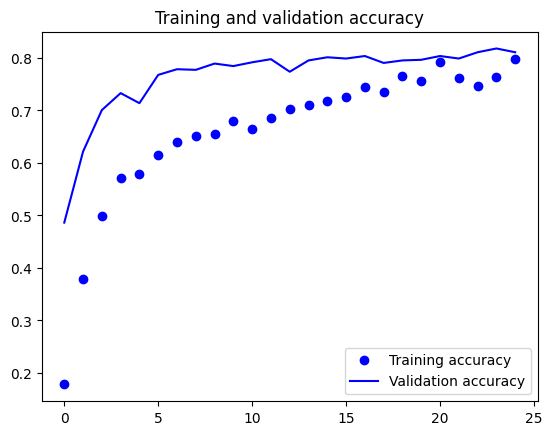

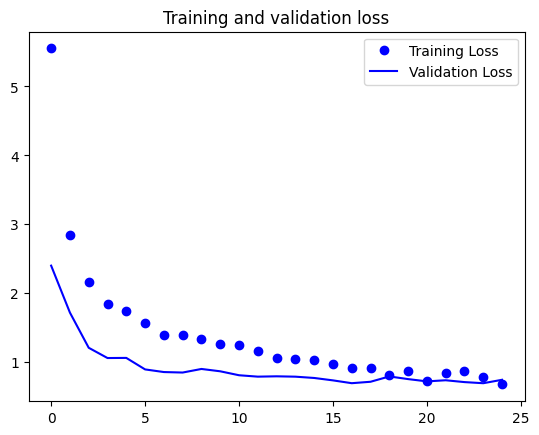

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
for layer in inception.layers[:249]:
    layer.trainable = False
for layer in inception.layers[249:]:
    layer.trainable = True

In [26]:
print("Building model with InceptionV3 with imagenet weights")
model_finetuned = Sequential([
    inception,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.2),
    Dense(133, activation='softmax')
])

# tell the model what cost and optimization method to use
model_finetuned.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


model.summary()

Building model with InceptionV3 with imagenet weights
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               26214912  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 133)               68229     
                                                                 
Total params: 48085925 (183.43 MB)
Trainable params: 37398021 (142.66 MB)
Non-trainable params: 10687904 (40.77 MB)
________________

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle

filepath = r"C:\dogImages\tune/model_finetuned1_{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early = EarlyStopping(monitor="acc", mode="max", patience=15)

callbacks_list = [checkpoint1, early] #early

history = model_finetuned.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set), 
    callbacks=callbacks_list
)

with open('trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

C:\Users\sebas\AppData\Local\Temp\ipykernel_15112\1437944360.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_finetuned.fit_generator(


Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 4.7749 - accuracy: 0.2744
Epoch 1: val_accuracy improved from -inf to 0.39521, saving model to C:\dogImages\tune\model_finetuned1_01-0.40.h5
14/14 [==============================] - 143s 10s/step - loss: 4.7749 - accuracy: 0.2744 - val_loss: 5.2070 - val_accuracy: 0.3952
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 1.4688 - accuracy: 0.6265
Epoch 2: val_accuracy improved from 0.39521 to 0.54731, saving model to C:\dogImages\tune\model_finetuned1_02-0.55.h5
14/14 [==============================] - 138s 11s/step - loss: 1.4688 - accuracy: 0.6265 - val_loss: 2.9475 - val_accuracy: 0.5473
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.8600 - accuracy: 0.7710
Epoch 3: val_accuracy improved from 0.54731 to 0.62874, saving model to C:\dogImages\tune\model_finetuned1_03-0.63.h5
14/14 [==============================] - 133s 9s/step - loss: 0.8600 - accuracy: 0.7710 - val_loss: 2.343

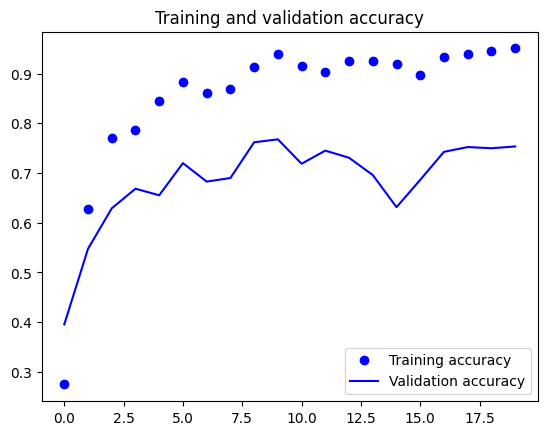

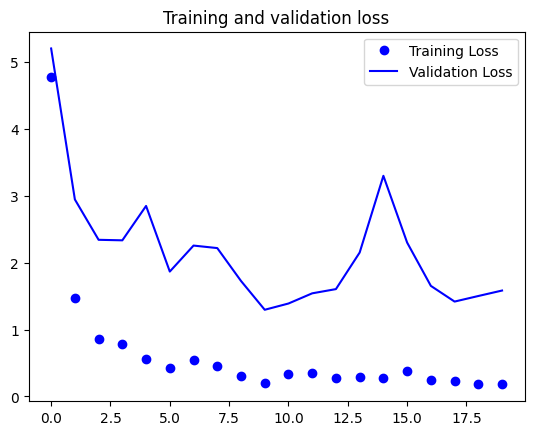

In [29]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
best_model_finetuned = load_model(r"C:\dogImages\model_fit_24-0.82.h5")

In [4]:
# Import OpenCV
import cv2

# Utility
import itertools
import random
from collections import Counter
from glob import iglob

test_dir=r"C:\dogImages\test"

def load_image(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255
    
    return img
data=tf.keras.utils.image_dataset_from_directory(r"C:\dogImages\train")
classes=data.class_names
print(classes)
def predict(image):
    probabilities = best_model_finetuned.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    
    return {classes[class_idx]: probabilities[class_idx]}

Found 6680 files belonging to 133 classes.
['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_d

In [5]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20,20),text_size=15, norm=False, savefig=True): 
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
    
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
            
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
    
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=70, fontsize=text_size)
    plt.yticks(fontsize=text_size)
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
            
    # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

In [6]:
num_of_test_samples=836 

In [7]:
Y_pred = best_model_finetuned.predict(test_set, num_of_test_samples // 50 + 1)
y_pred = np.argmax(Y_pred, axis=1)

NameError: name 'test_set' is not defined

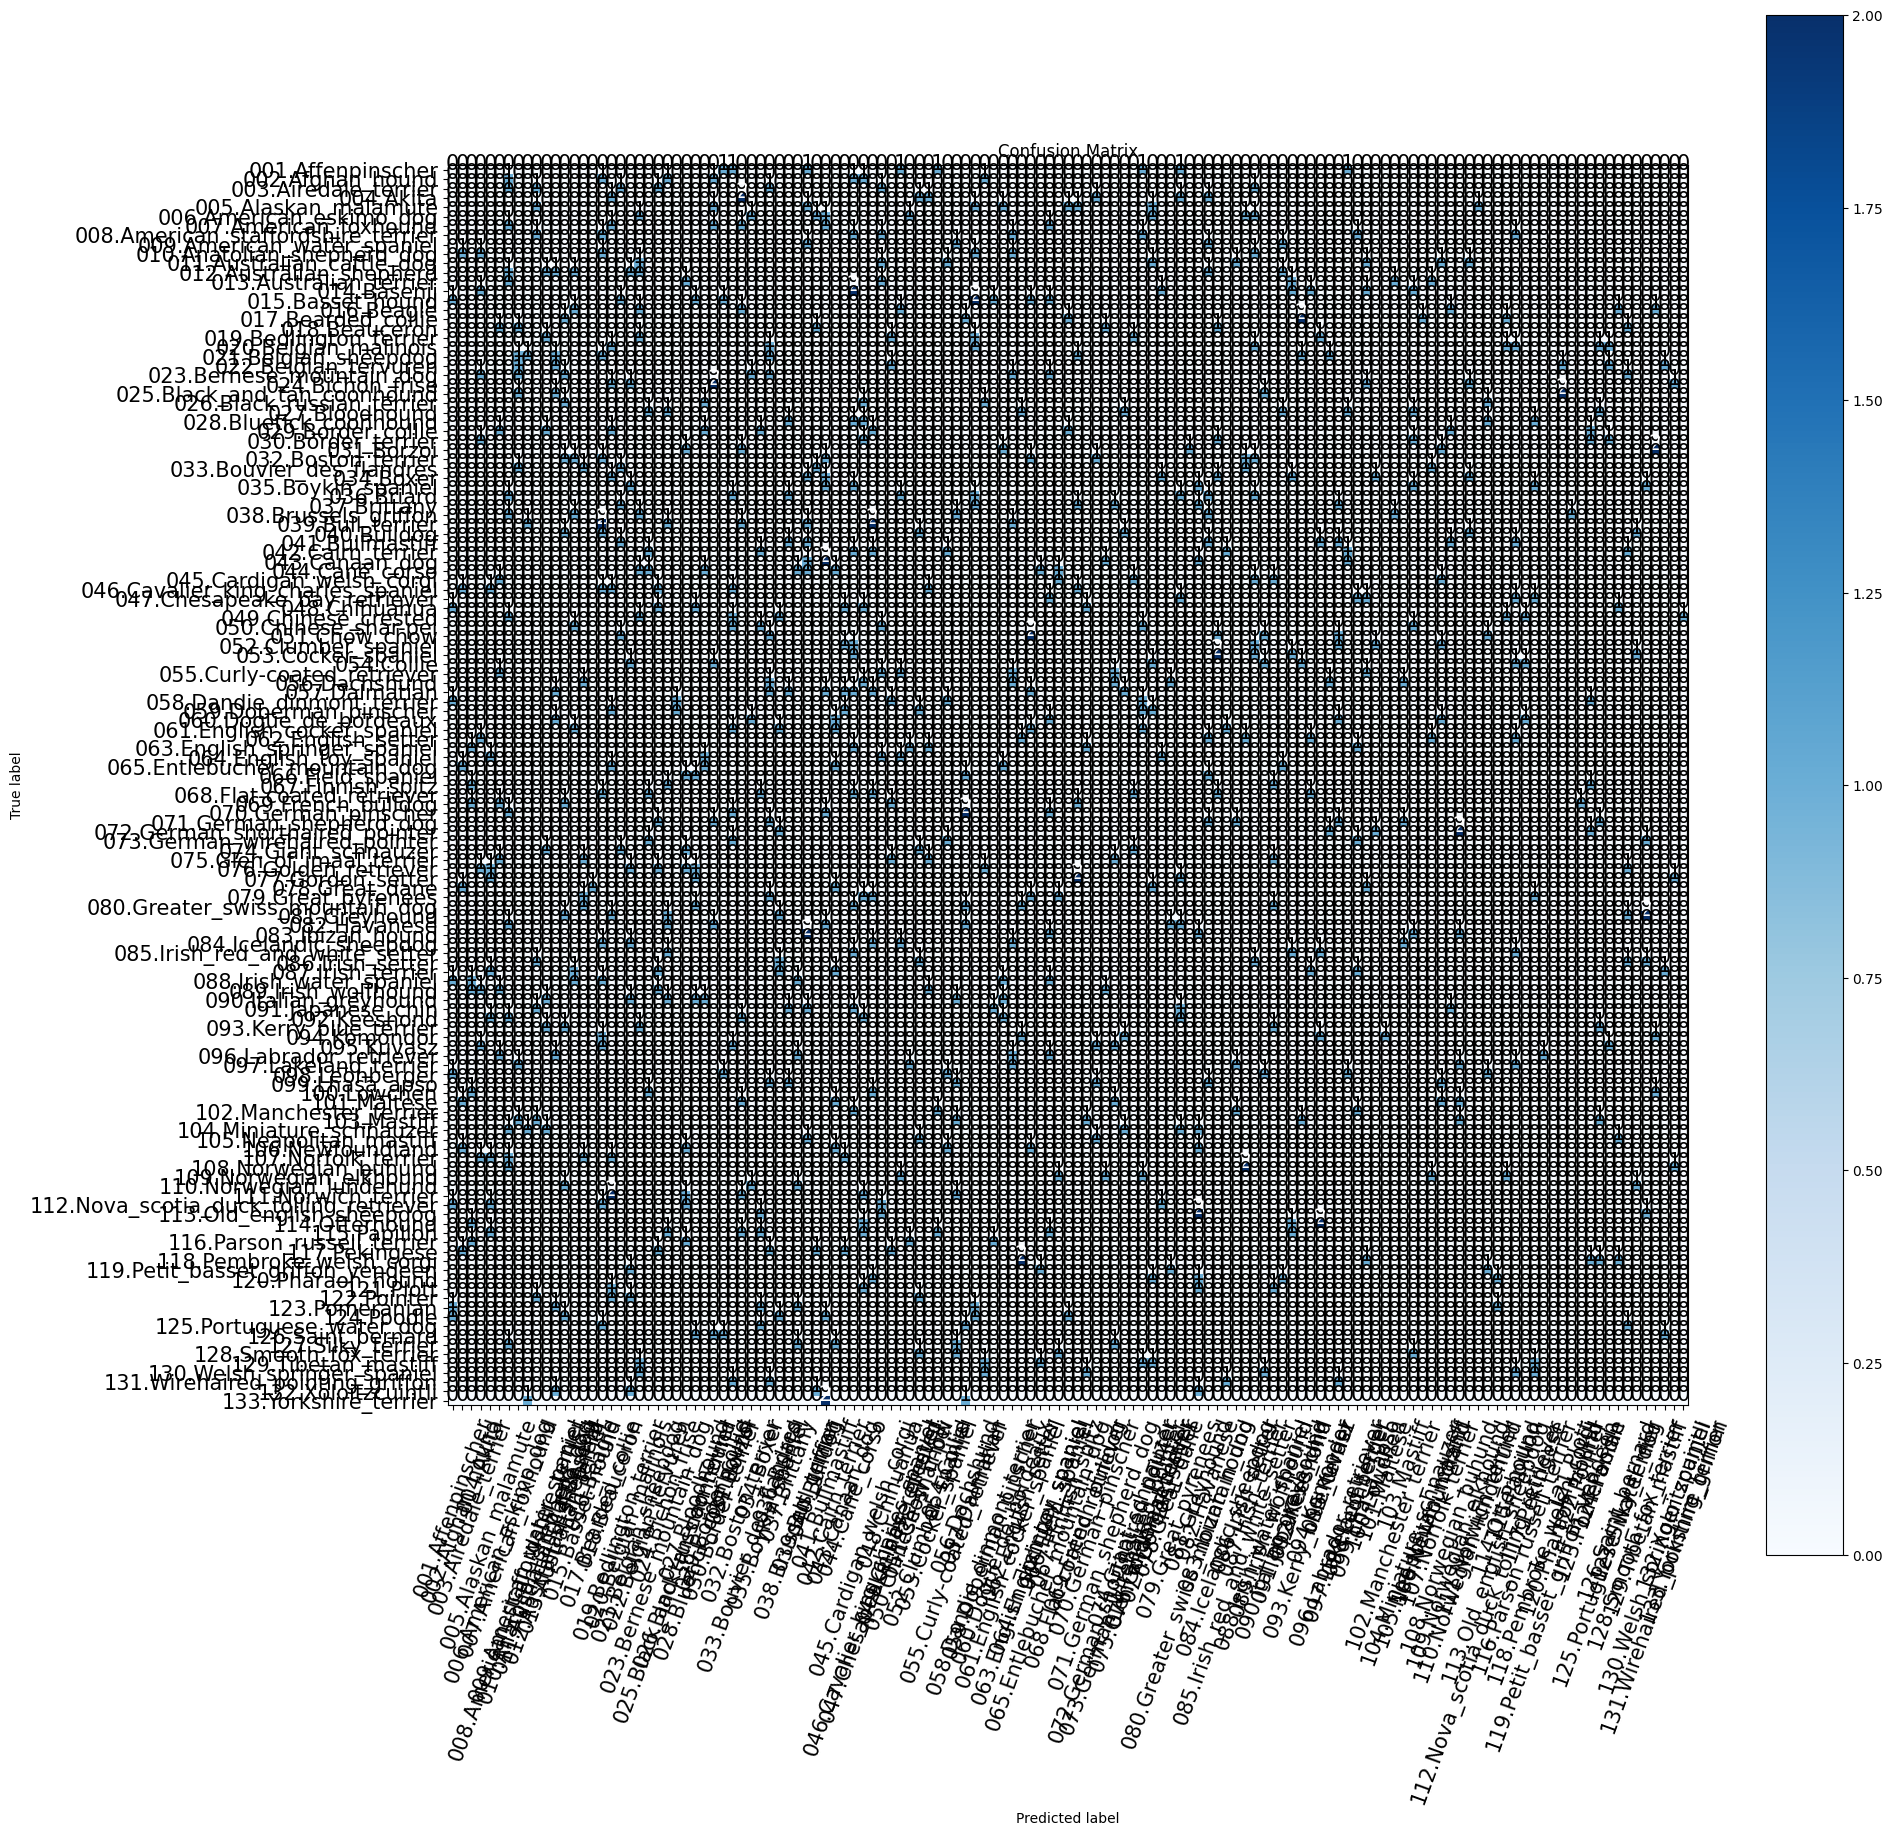

In [41]:
import os
make_confusion_matrix(test_set.classes, y_pred,classes=classes)

In [8]:
path =r"C:\dogImages\test"
PList=glob.glob(r"C:\Users\sebas\OneDrive\Pictures\xoloitzcuintli-mexican-hairless-vertical-dirt-588581136-094543beb7474665a01dca94b1dbfb10.jpg")
for filename in PList:
    img = load_image(str(filename))
    prediction = predict(img)
    print("ACTUAL CLASS: %s, PREDICTED: class: %s, confidence: %f" % (os.path.basename(filename), list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.show()

NameError: name 'IMAGE_SIZE' is not defined